In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils
from img_processing import get_Sckeleton, generate_Mask, get_Measurement, pose_detect
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

In [2]:
img = cv2.imread('./images/1-2.png')
res_land = pose_detect(img)
# plt.imshow(res_anno)
print(res_land)

Invalid Image


estimation height :  None
estimation width :  None
estimation shoulder-width :  None
estimation hip-width :  None


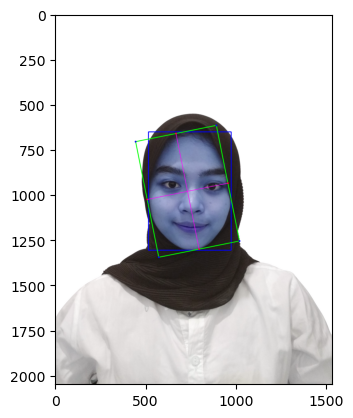

In [3]:
h,w,s,hp = get_Measurement(img, 185)
mask = generate_Mask(img)
imgc, box = get_Sckeleton(img,mask)
plt.imshow(imgc)
print("estimation height : ",h)
print("estimation width : ",w)
print("estimation shoulder-width : ",s)
print("estimation hip-width : ", hp)

In [4]:
img = cv2.imread('./images/temen-firman.jpg')
res_land = pose_detect(img)
# plt.imshow(res_anno)
print(res_land)

landmark {
  x: 0.5446056127548218
  y: 0.3841213881969452
  z: -0.1080300360918045
  visibility: 0.9991973042488098
}
landmark {
  x: 0.5303030610084534
  y: 0.3852902054786682
  z: -0.27300238609313965
  visibility: 0.9989227652549744
}
landmark {
  x: 0.5125036835670471
  y: 0.3904636800289154
  z: -0.27176961302757263
  visibility: 0.9988623261451721
}
landmark {
  x: 0.4944210350513458
  y: 0.39560189843177795
  z: -0.2705651521682739
  visibility: 0.9985960125923157
}
landmark {
  x: 0.5768937468528748
  y: 0.38272562623023987
  z: -0.2459029108285904
  visibility: 0.9989720582962036
}
landmark {
  x: 0.5943309664726257
  y: 0.3867100179195404
  z: -0.2450322061777115
  visibility: 0.9989680647850037
}
landmark {
  x: 0.6122981905937195
  y: 0.3904549181461334
  z: -0.24426470696926117
  visibility: 0.9988410472869873
}
landmark {
  x: 0.462478905916214
  y: 0.43507108092308044
  z: -0.7061335444450378
  visibility: 0.998577892780304
}
landmark {
  x: 0.6434023380279541
  y: 0.43

estimation height :  185.0
estimation shoulder-width :  57.7
estimation hip-width :  36.8


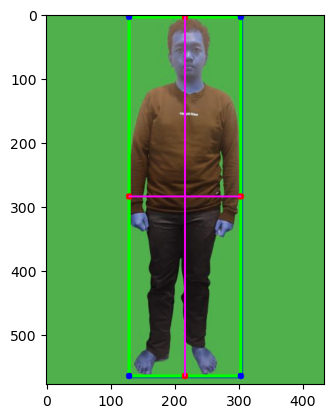

In [14]:
h,s,hp = get_Measurement(img, 185)
mask = generate_Mask(img)
imgc, box = get_Sckeleton(img,mask)
plt.imshow(imgc)
print("estimation height : ",h)
# print("estimation width : ",w)
print("estimation shoulder-width : ",s)
print("estimation hip-width : ",hp)

In [15]:
df = pd.read_csv('./dataset/normalized_dataset.csv')

In [16]:
output_data = df['Size'].values

In [17]:
import pickle
with open("./model/model.pkl", "rb") as f:
    model = pickle.load(f)

In [18]:
model = tf.keras.models.model_from_json(model)
label_encoder = LabelEncoder()
output_daat = label_encoder.fit_transform(output_data)

In [19]:
def pred_size(data):
    data = np.array(data)
    data = np.reshape(data, (1, data.shape[0]))
    pred = model.predict(data)
    predicted_labels = np.argmax(pred, axis=1)
    predicted_sizes = label_encoder.inverse_transform(predicted_labels)
    return predicted_sizes

In [20]:
# input_data = df[['Age', 'ShoulderWidth', 'Hips', 'TotalHeight']].values
input_data = [21, s, hp, h]
print(pred_size(input_data))

1/1 [==============================] - 0s 111ms/step
['XL']
